<a href="https://colab.research.google.com/github/sramanah/sramanah/blob/main/Model_Jul_3_2022_Shaleena_Ramanah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing necessary packages**

In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import scipy

# **Uploading the data**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard (2).csv


# **Convert to dataframe**

In [5]:
#converting csv file to panda
df =pd.read_csv("creditcard.csv")

# **31 features, 284807 instances. No missing values**

In [22]:
df.info()
#284807 instances
#31 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
#no missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# **Categorical features (Class) vs Numerical features(Time, Amount, V1-V28)**



In [68]:
# Finding unique values for each column in order to identify categorical and numeric variables

# Usually if the numer of unique values are less than 20, the variable is likely to be categorical, otherwise it is continuous
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

# **Univariate Analysis**

In [ ]:
df.describe()

# **Visualize distribution of Continuous Variables**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f797e008c10>,
      dtype=object)

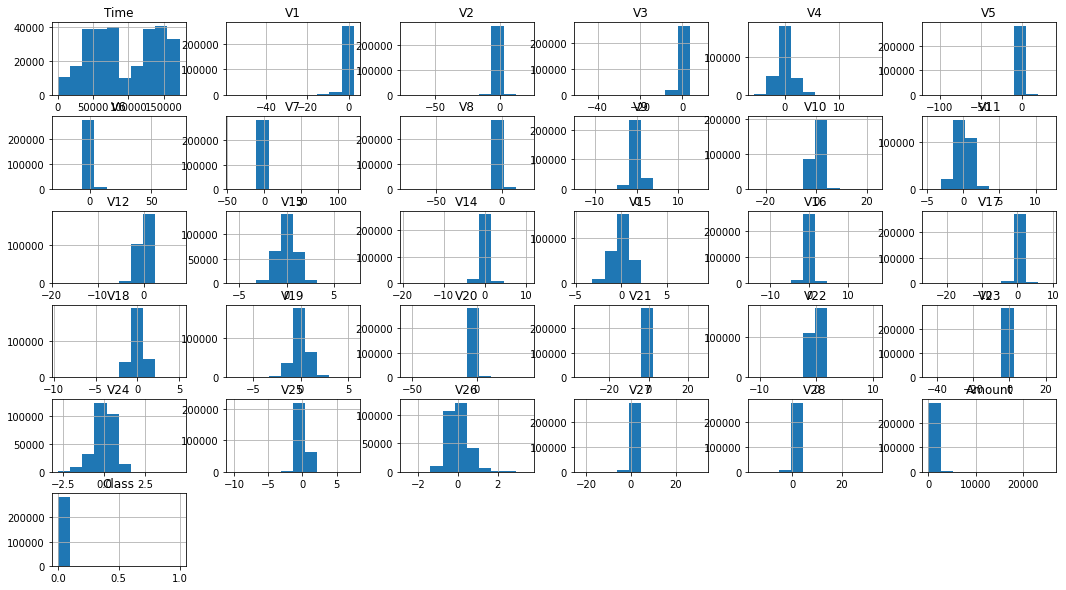

In [69]:
# Plotting histograms of continuous variables

df.hist(figsize=(18,10))

# **Bivariate Analysis**

# ***** PART 1 - **Separating the Dataset into Fraud and Normal**

In [139]:
#Separating the dataset into 2 classes - Normal and Fraud

fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [140]:
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [141]:
#let's analyse the difference between the normal amounts and fraudulent amounts

normal.Amount.describe()
#mean normal amount 88 euros
#max is 25,691
#min is 0

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [142]:
fraud.Amount.describe()
#mean fradulent amount is 122 euro
#max is 2,125.87 euros
#min is 0

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# **Amount per Transaction by Class Type**

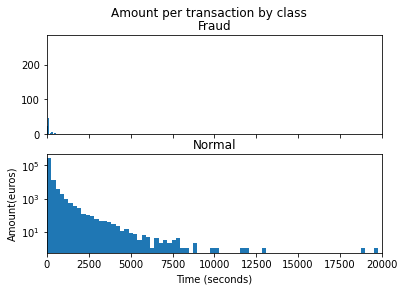

In [143]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins= 100
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins=bins)
ax2.set_title('Normal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount(euros)')
plt.xlim(0,20000)
plt.yscale('log')
plt.show();


#Do the fradulent transactions occur during a specific timeframe?

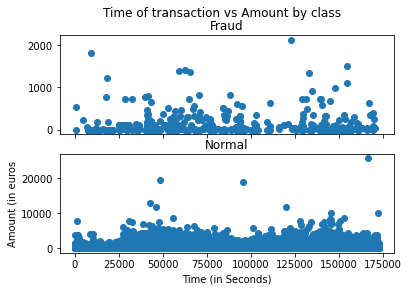

In [144]:
#Do the fradulent transactions occur during a specific timeframe?



f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount (in euros')
plt.show();


# **Making a copy of the data **

In [25]:
data = df.copy()

# **Data Transformation**

# ***** PART 2 - **Analysing the Dataset by separating the data into Day 1 and Day 2**

As Time is the duration in seconds from the first transaction, we will create a new feature to convert seconds to Date.

We are also creating another column to distinguish the transactions from day 1 and day 2

Time_new = Date
Day = Day 1 or Day 2

In [26]:
data['Time_new'] = pd.to_datetime(data['Time'], unit='s')


In [27]:
#To separate travel date to different columns -Date and Day as Time is in duration (seconds)
data['Date'] = pd.to_datetime(data['Time_new']).dt.date
data['Day'] = pd.to_datetime(data['Date']).dt.day

In [28]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_new,Date,Day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1970-01-01 00:00:00,1970-01-01,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1970-01-01 00:00:00,1970-01-01,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1970-01-01 00:00:01,1970-01-01,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1970-01-01 00:00:01,1970-01-01,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1970-01-01 00:00:02,1970-01-01,1


Separating the dataset into Day 1 and Day 2

# **DATASET#1: Day 1 and Day 2 Datasets**

In [30]:
Day1 = data.loc[data.Day == 1]
Day2 = data.loc[data.Day == 2]
#Day 1 has 144786 rows × 34 columns
#Day 2 has 140021 rows × 34 columns

# **------> Day 1**

# **Frequency of normal and fraudulent transactions on Day 1**

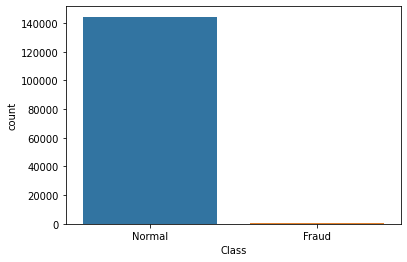

0    144505
1       281
Name: Class, dtype: int64


In [31]:

# Frequency of normal and fraudulent transactions on Day 1
df1 = sns.countplot(Day1['Class'])
df1.set_xticklabels(['Normal','Fraud'])
plt.show()

print(pd.Series(Day1.Class).value_counts())
plt.show()

#In Day 1, there are 144,505 normal transactions and 281 fradulent transactions

# **Mean Amount of normal and fraudulent transactions on Day 1**

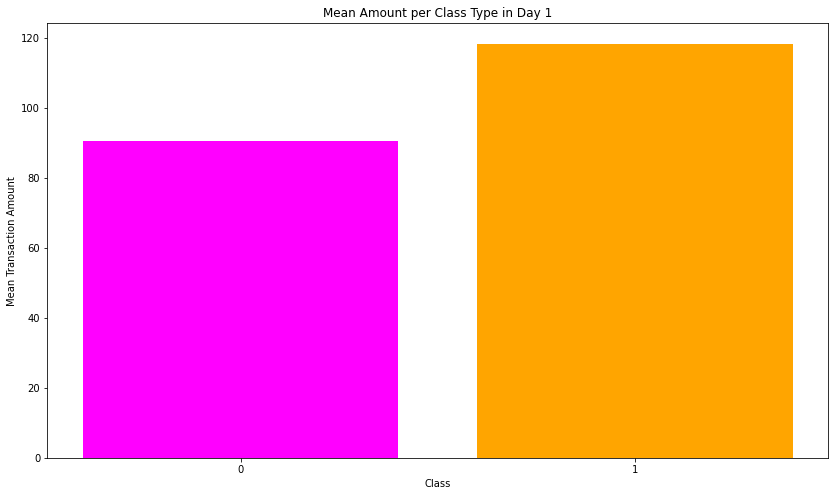

In [81]:
#Average amount per class type in Day 1
%matplotlib inline


av_amount_per_class = Day1.groupby('Class').Amount.mean()

#sort by amount
av_amount_per_class.sort_values(inplace=True)

x = av_amount_per_class.index.tolist()
y = av_amount_per_class.values.tolist()

#set figure size
plt.figure(figsize=(14,8))

#set title
plt.title('Mean Amount per Class Type in Day 1')

#set axis labels
plt.xlabel('Class')
plt.ylabel('Mean Transaction Amount')

plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.bar(x,y, color =['magenta', 'orange']);

# **DATASET#2: Fraudulent transactions on Day 1 and Normal transactions on Day 1**

In [86]:
FraudDay1 = Day1.loc[Day1.Class == 1]
NormalDay1 = Day1.loc[Day1.Class == 0]

# **Frequency of Fraudulent Transactions on Day 1**

(array([163.,  10.,  41.,  11.,   6.,   3.,   7.,   4.,   9.,   3.,   1.,
          1.,   3.,   1.,   4.,   1.,   0.,   1.,   0.,   2.,   1.,   2.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.    ,   36.1936,   72.3872,  108.5808,  144.7744,  180.968 ,
         217.1616,  253.3552,  289.5488,  325.7424,  361.936 ,  398.1296,
         434.3232,  470.5168,  506.7104,  542.904 ,  579.0976,  615.2912,
         651.4848,  687.6784,  723.872 ,  760.0656,  796.2592,  832.4528,
         868.6464,  904.84  ,  941.0336,  977.2272, 1013.4208, 1049.6144,
        1085.808 , 1122.0016, 1158.1952, 1194.3888, 1230.5824, 1266.776 ,
        1302.9696, 1339.1632, 1375.3568, 1411.5504, 1447.744 , 1483.9376,
        1520.1312, 1556.3248, 1592.5184, 1628.712 , 1664.9056, 1701.0992,
        1737.2928, 1773.4864, 1809.68  ]),
 <a list of 50 Patch ob

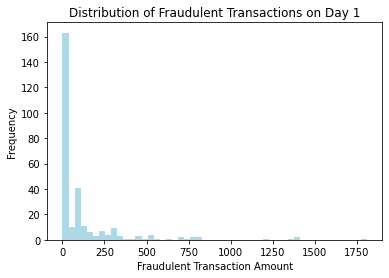

In [95]:
#title
plt.title('Distribution of Fraudulent Transactions on Day 1')

#x and y labels
plt.xlabel('Fraudulent Transaction Amount')
plt.ylabel('Frequency')

#plot histogram
plt.hist(FraudDay1['Amount'], bins=50, color='lightblue')


# **Boxplot showing Outliers of Fraudulent Transactions on Day 1**

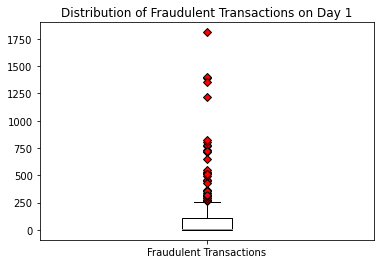

In [100]:
data1 = FraudDay1['Amount']

#create outlier point shape
red_diamond = dict(markerfacecolor= 'r', marker='D')

#set title
plt.title('Distribution of Fraudulent Transactions on Day 1')

#plot boxplot
plt.boxplot(data1.values, labels=['Fraudulent Transactions'], flierprops = red_diamond);

# **Frequency of Normal Transactions on Day 1**

(array([1.37741e+05, 4.34600e+03, 1.26900e+03, 5.32000e+02, 2.50000e+02,
        1.07000e+02, 8.00000e+01, 5.00000e+01, 3.50000e+01, 3.00000e+01,
        2.60000e+01, 9.00000e+00, 3.00000e+00, 9.00000e+00, 3.00000e+00,
        4.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.    ,   393.1306,   786.2612,  1179.3918,  1572.5224,
         1965.653 ,  2358.7836,  2751.9142,  3145.0448,  3538.1754,
         3931.306 ,  4324.4366,  4717.5672,  5110.6978,  5503.8284,
         5896.959 ,  6290.0896,  6683.2202,  7076.3508,  7469.48

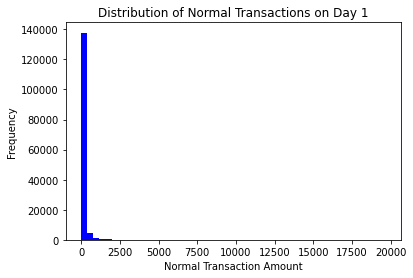

In [96]:
#title
plt.title('Distribution of Normal Transactions on Day 1')

#x and y labels
plt.xlabel('Normal Transaction Amount')
plt.ylabel('Frequency')

#plot histogram
plt.hist(NormalDay1['Amount'], bins=50, color='blue')


# **Boxplot showing Outliers of Normal Transactions on Day 1**

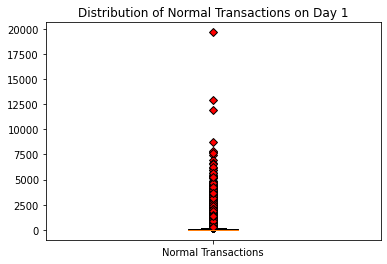

In [103]:
data2 = NormalDay1['Amount']

#create outlier point shape
red_diamond = dict(markerfacecolor= 'r', marker='D')

#set title
plt.title('Distribution of Normal Transactions on Day 1')

#plot boxplot
plt.boxplot(data2.values, labels=['Normal Transactions'], flierprops = red_diamond);

# **------> Day 2**

# **Frequency of normal and fraudulent transactions on Day 2**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


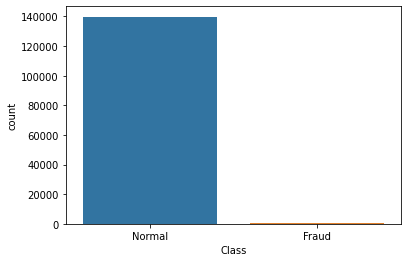

0    139810
1       211
Name: Class, dtype: int64


In [66]:
# Frequency of Normal and Fraudulent transactions in Day 2
df2 = sns.countplot(Day2['Class'])
df2.set_xticklabels(['Normal','Fraud'])
plt.show()

print(pd.Series(Day2.Class).value_counts())
plt.show()

#In Day 2, there are 139,810 normal transactions and 211 fradulent transactions

# **Mean amount of normal and fraudulent transactions on Day 2**

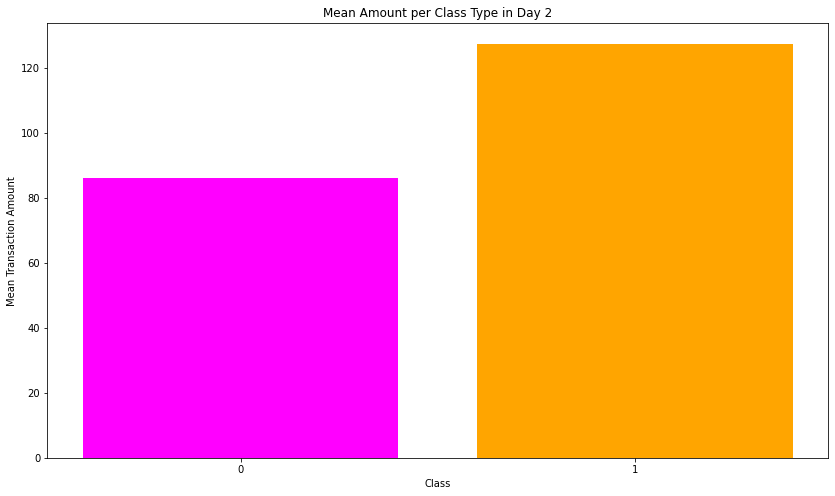

In [85]:
#Average amount per class type in Day 2
%matplotlib inline


av_amount_per_class = Day2.groupby('Class').Amount.mean()

#sort by amount
av_amount_per_class.sort_values(inplace=True)

x = av_amount_per_class.index.tolist()
y = av_amount_per_class.values.tolist()

#set figure size
plt.figure(figsize=(14,8))

#set title
plt.title('Mean Amount per Class Type in Day 2')

#set axis labels
plt.xlabel('Class')
plt.ylabel('Mean Transaction Amount')

plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.bar(x,y, color =['magenta', 'orange']);

# **DATASET#3: Fraudulent transactions and Normal Transactions on Day 2**

In [97]:
FraudDay2 = Day2.loc[Day2.Class == 1]
NormalDay2 = Day2.loc[Day2.Class == 0]

# **Frequency of Fraudulent Transactions on Day 2**

(array([131.,  19.,  14.,   5.,   7.,   3.,   3.,   4.,   5.,   1.,   1.,
          1.,   0.,   2.,   3.,   1.,   1.,   3.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.    ,   42.5174,   85.0348,  127.5522,  170.0696,  212.587 ,
         255.1044,  297.6218,  340.1392,  382.6566,  425.174 ,  467.6914,
         510.2088,  552.7262,  595.2436,  637.761 ,  680.2784,  722.7958,
         765.3132,  807.8306,  850.348 ,  892.8654,  935.3828,  977.9002,
        1020.4176, 1062.935 , 1105.4524, 1147.9698, 1190.4872, 1233.0046,
        1275.522 , 1318.0394, 1360.5568, 1403.0742, 1445.5916, 1488.109 ,
        1530.6264, 1573.1438, 1615.6612, 1658.1786, 1700.696 , 1743.2134,
        1785.7308, 1828.2482, 1870.7656, 1913.283 , 1955.8004, 1998.3178,
        2040.8352, 2083.3526, 2125.87  ]),
 <a list of 50 Patch ob

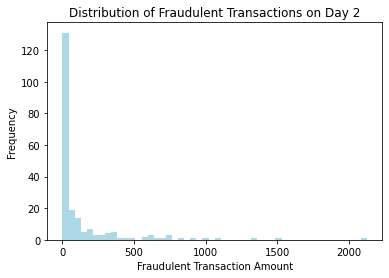

In [98]:
#title
plt.title('Distribution of Fraudulent Transactions on Day 2')

#x and y labels
plt.xlabel('Fraudulent Transaction Amount')
plt.ylabel('Frequency')

#plot histogram
plt.hist(FraudDay2['Amount'], bins=50, color='lightblue')

# **Boxplot showing Outliers of Fraudulent Transactions on Day 2**

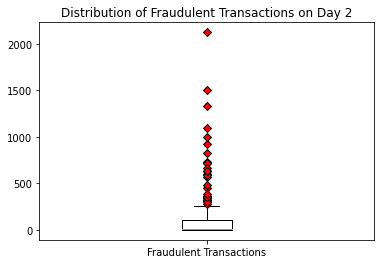

In [105]:
data3 = FraudDay2['Amount']

#create outlier point shape
red_diamond = dict(markerfacecolor= 'r', marker='D')

#set title
plt.title('Distribution of Fraudulent Transactions on Day 2')

#plot boxplot
plt.boxplot(data3.values, labels=['Fraudulent Transactions'], flierprops = red_diamond);

# **Frequency of Normal Transactions on Day 2**

(array([1.37741e+05, 4.34600e+03, 1.26900e+03, 5.32000e+02, 2.50000e+02,
        1.07000e+02, 8.00000e+01, 5.00000e+01, 3.50000e+01, 3.00000e+01,
        2.60000e+01, 9.00000e+00, 3.00000e+00, 9.00000e+00, 3.00000e+00,
        4.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.    ,   393.1306,   786.2612,  1179.3918,  1572.5224,
         1965.653 ,  2358.7836,  2751.9142,  3145.0448,  3538.1754,
         3931.306 ,  4324.4366,  4717.5672,  5110.6978,  5503.8284,
         5896.959 ,  6290.0896,  6683.2202,  7076.3508,  7469.48

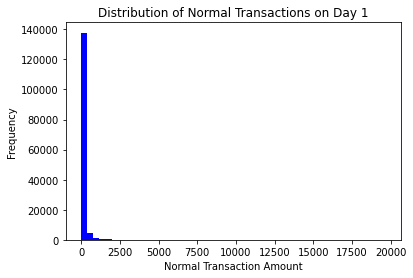

In [99]:
#title
plt.title('Distribution of Normal Transactions on Day 1')

#x and y labels
plt.xlabel('Normal Transaction Amount')
plt.ylabel('Frequency')

#plot histogram
plt.hist(NormalDay1['Amount'], bins=50, color='blue')


# **Boxplot showing Outliers of Normal Transactions on Day 2**

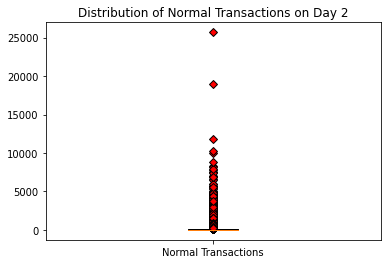

In [106]:
data4 = NormalDay2['Amount']

#create outlier point shape
red_diamond = dict(markerfacecolor= 'r', marker='D')

#set title
plt.title('Distribution of Normal Transactions on Day 2')

#plot boxplot
plt.boxplot(data4.values, labels=['Normal Transactions'], flierprops = red_diamond);

#PART 3: **Multivariate Analysis : Analyzing the relationship between the variables**

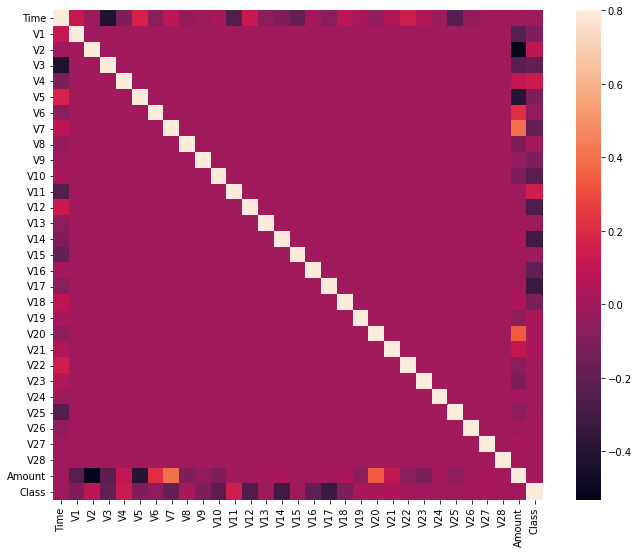

In [154]:
#Correlation Matrix

correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

#Class has some correlations with V1,V3,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18 features but not with time and amount

In [175]:
data_edit = data.copy()

In [176]:
data_edit['Class'] = data_edit.Class.astype('category')

In [177]:
data_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 34 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Time      284807 non-null  float64       
 1   V1        284807 non-null  float64       
 2   V2        284807 non-null  float64       
 3   V3        284807 non-null  float64       
 4   V4        284807 non-null  float64       
 5   V5        284807 non-null  float64       
 6   V6        284807 non-null  float64       
 7   V7        284807 non-null  float64       
 8   V8        284807 non-null  float64       
 9   V9        284807 non-null  float64       
 10  V10       284807 non-null  float64       
 11  V11       284807 non-null  float64       
 12  V12       284807 non-null  float64       
 13  V13       284807 non-null  float64       
 14  V14       284807 non-null  float64       
 15  V15       284807 non-null  float64       
 16  V16       284807 non-null  float64    

In [ ]:

#sns.pairplot(data_edit, hue='Class', height=2.5);

# **Detecting Multicollinearity using VIF(Variable Inflation Factors).**

In [12]:
df2 = df.copy()
y = df2['Class'] 
X =df2[df2 != 'Class']

In [13]:

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


calc_vif(X)

,variables,VIF
0,Time,2.339858
1,V1,1.638237
2,V2,3.900804
3,V3,1.321018
4,V4,1.172479
5,V5,2.764441
6,V6,1.528629
7,V7,2.603517
8,V8,1.098591
9,V9,1.037715


As Amount is the only variable with high multicollinearity, we won't drop it. Amount is an important feature which we cannot drop. The other features can be kept as they have low multicollinearity (below 5)



0	Time	2.339858
1	V1	1.638237
2	V2	3.900804
3	V3	1.321018
4	V4	1.172479
5	V5	2.764441
6	V6	1.528629
7	V7	2.603517
8	V8	1.098591
9	V9	1.037715
10	V10	1.208870
11	V11	1.080378
12	V12	1.154440
13	V13	1.003473
14	V14	1.219562
15	V15	1.014148
16	V16	1.080994
17	V17	1.227258
18	V18	1.033900
19	V19	1.040800
20	V20	2.233935
21	V21	1.103107
22	V22	1.082408
23	V23	1.149293
24	V24	1.000773
25	V25	1.013526
26	V26	1.000539
27	V27	1.009509
28	V28	1.001595
29	Amount	11.507919
30	Class	2.093512




# PART 4:**Feature selection - ANOVA**

Using Filter method,  ANOVA statistical test to determine relationship between categorical and numerical variables:

Assumption(H0): There is no relationship between the variables (i.e. The average(mean) values of the numeric Predictor variable is the same for all the groups in the categorical Target variable)

ANOVA Test result: Probability of H0 being true

In [10]:
import warnings
warnings.filterwarnings("ignore")

#load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#load data
df3 = df.copy()

#create features and target
target = df3['Class'] 
features_df = df3.drop(['Class'], axis=1) 


#Select features with best ANOVA F values - create selectKbest object
selector = SelectKBest(f_classif, k=10)

#Apply the selectkbest object to features and target
selector.fit(features_df,target)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = features_df.iloc[:,cols]

#Show results
print("Original amount of features:", features_df.shape)
print("Reduced amount of features:", features_df_new .shape)


Original amount of features: (284807, 30)
Reduced amount of features: (284807, 10)


**Selected the 10 best features using ANOVA test:  V3, V4, V7, V10, V11, V14, V16, V17, V18 **

In [12]:
features_df_new.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


#Part 5-  **Seggregating the variables - dependent & independent per Day 1 and Day 2**

In [32]:
df_1 = Day1.copy()
df_2 = Day2.copy()

# **Train Test Split**

# **TRAIN SET - DAY 1**

In [40]:

y1 = df_1['Class']
x1 = df_1.drop(['Class','Time_new','Date','Day','Time', 'V1', 'V2', 'V5', 'V6', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'], axis=1)

In [52]:
#Distribution in training set
y1.value_counts(normalize=True)


0    0.998059
1    0.001941
Name: Class, dtype: float64

In [54]:
#shape of training set
y1.shape, x1.shape

((144786,), (144786, 10))

# **TEST SET - DAY 2**

In [41]:
y2 = df_2['Class']
x2 = df_2.drop(['Class','Time_new','Date','Day','Time', 'V1', 'V2', 'V5', 'V6', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'], axis=1)

In [53]:
#Distribution in testing/validation set
y2.value_counts(normalize=True)

0    0.998493
1    0.001507
Name: Class, dtype: float64

In [55]:
#shape of testing set
x2.shape, y2.shape

((140021, 10), (140021,))

# Due to class imbalance, upsample the data to balance the dataset. Note: do not apply on testing set as there will be knowledge leak

In [90]:
from sklearn.utils import resample

In [95]:
df_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_new,Date,Day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1970-01-01 00:00:00,1970-01-01,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1970-01-01 00:00:00,1970-01-01,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1970-01-01 00:00:01,1970-01-01,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1970-01-01 00:00:01,1970-01-01,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1970-01-01 00:00:02,1970-01-01,1


In [94]:
#create two different dataframe of majority and minority class 
df_majority = df_1[(df_1['Class']==0)] 
df_minority = df_1[(df_1['Class']==1)] 

In [96]:
df_majority.shape


(144505, 34)

In [97]:
df_minority.shape

(281, 34)

In [98]:
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 144505, # to match majority class
                                 random_state=42)  # reproducible results


In [99]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [100]:
#display new class counts
df_upsampled['Class'].value_counts()

1    144505
0    144505
Name: Class, dtype: int64

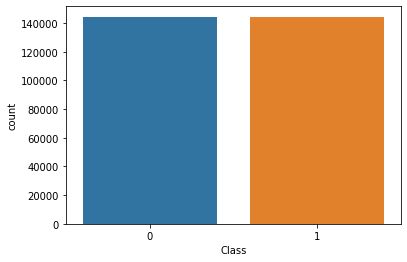

In [101]:
sns.countplot(df_upsampled['Class'])

In [103]:
df_upsampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_new,Date,Day
33276,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1,1970-01-01 10:19:27,1970-01-01,1
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1,1970-01-01 23:33:09,1970-01-01,1
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1,1970-01-01 11:17:42,1970-01-01,1
15781,27219.0,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99,1,1970-01-01 07:33:39,1970-01-01,1
77348,57007.0,-1.271244,2.462675,-2.851395,2.324480,-1.372245,-0.948196,-3.065234,1.166927,-2.268771,...,-0.523582,0.224228,0.756335,0.632800,0.250187,0.01,1,1970-01-01 15:50:07,1970-01-01,1


# **New TRAIN SET (UPSAMPLED - DAY 1)**

In [104]:

y1 = df_upsampled['Class']
x1 = df_upsampled.drop(['Class','Time_new','Date','Day','Time', 'V1', 'V2', 'V5', 'V6', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'], axis=1)

# **SAME TEST SET (DAY 2)**

In [105]:
y2 = df_2['Class']
x2 = df_2.drop(['Class','Time_new','Date','Day','Time', 'V1', 'V2', 'V5', 'V6', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'], axis=1)

# **Predict Day 2 (test) from Day 1(train) Dataset**

# **Decision Tree Classifier**

In [106]:
#import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier


In [107]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [108]:
#fitting the model
dt_model.fit(x1, y1)

DecisionTreeClassifier(random_state=10)

In [109]:
#checking the training score
dt_model.score(x1,y1)

1.0

In [110]:
#checking the testing score
dt_model.score(x2,y2)

0.9986787696131295

In [111]:
#predict on testing set
dt_model.predict(x2)

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
dt_model.predict_proba(x2)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [113]:
y_pred = dt_model.predict_proba(x2)[:,1]

In [114]:
new_y = []
for i in range (len(y_pred)):
  if y_pred[i]<0.6:
    new_y.append(0)
  else:
    new_y.append(1)

# **EVALUATION METRICS - DECISION TREE CLASSIFIER**

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
accuracy_score(y2, new_y)

0.9986787696131295

In [122]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y2, new_y)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[139689    121]
 [    64    147]]
TP:  147 , FP:  121 , TN:  139689 , FN: 64


In [123]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y2, new_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139810
           1       0.55      0.70      0.61       211

    accuracy                           1.00    140021
   macro avg       0.77      0.85      0.81    140021
weighted avg       1.00      1.00      1.00    140021



# **Changing the max_depth**

In [124]:
train_accuracy = []
validation_accuracy = []
for depth in range (1,10):
  dt_model = DecisionTreeClassifier(max_depth=depth, random_state = 10)
  dt_model.fit(x1,y1)
  train_accuracy.append(dt_model.score(x1,y1))
  validation_accuracy.append(dt_model.score(x2,y2))

In [127]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.930328,0.948272
1,2,0.930328,0.948272
2,3,0.944203,0.890159
3,4,0.954669,0.917884
4,5,0.960382,0.982267


No handles with labels found to put in legend.


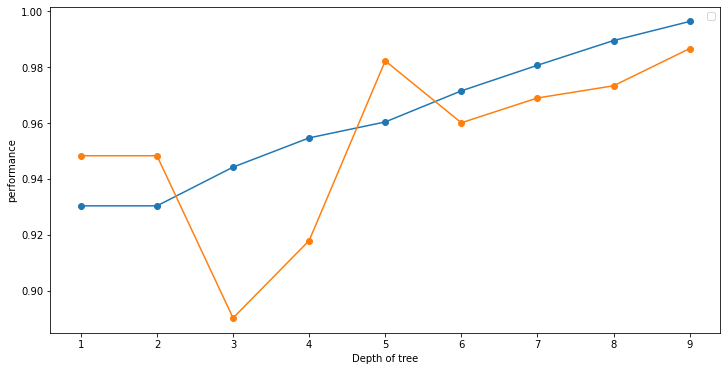

In [126]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [128]:
dt_model = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=25, random_state=10)

In [129]:
#fitting the model
dt_model.fit(x1,y1)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=25, random_state=10)

In [130]:
#training score
dt_model.score(x1,y1)

0.97727068267534

In [131]:
#validation score
dt_model.score(x2,y2)

0.9599488648131351

In [132]:
from sklearn import tree


In [80]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=x1.columns, max_depth=9, filled=True)

In [83]:
!dot -Tpng tree.dot -o tree.png

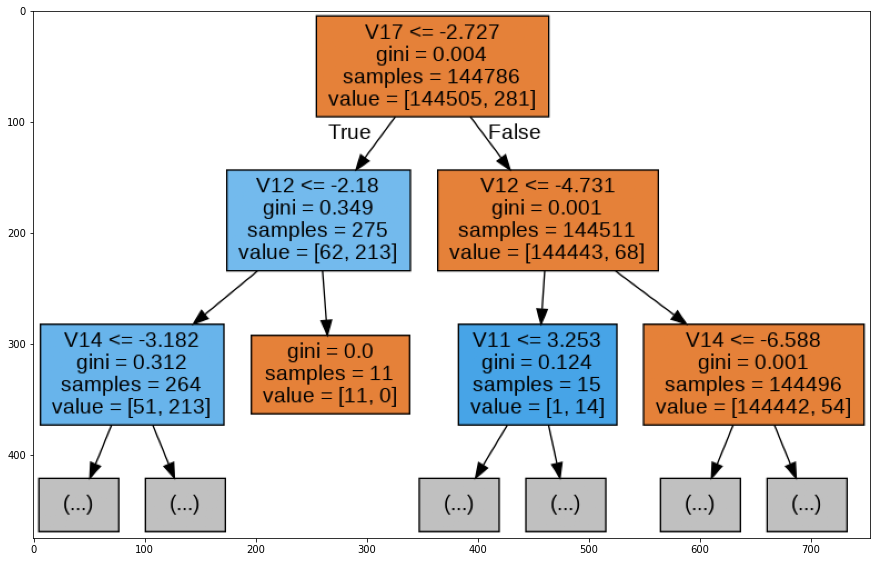

In [135]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)